# Linear Regression

## Model

given a dataset $\left \{ (x^{(1)},y^{(1)}),...,(x^{(n)},y^{(n)}) \right \} $, where $x^{(i)} \in \mathbb{R}^{d},\ y^{(i)} \in \mathbb{R}$.

linear regression is trying to model $y^{(i)}$ from $x^{(i)}$ by a linear model:

$$h_{\theta}(x^{(i)}) = \theta_{0} + \theta_{1}x_{1}^{(i)} + \theta_{2}x_{2}^{(i)} + ... + \theta_{d}x_{d}^{(i)}\approx y^{(i)}$$

for the sake of simplicity, we set $x_{0}^{(i)}=1,\ x^{(i)} = (x_{0}^{(i)},...,x_{d}^{(i)}),\ \theta=(\theta_{0},...,\theta_{d})$, then:

$$h_{\theta}(x^{(i)}) = \sum_{j=0}^{d}\theta_{j}x_{j}^{(i)} = \theta^{T}x^{(i)}$$

## Loss Function

given $\hat{y}=(h_{\theta}^{(1)},...,h_{\theta}^{(n)}),\ y=(y^{(1)},...,y^{(n)})$.

we want to approximate $y$ by $\hat{y}$, or equivalent to say, we want to minimize the distance between $\hat{y}$ and $y$.

using euclidean distance, we derive the loss function for linear regression:

$$J(\theta) = \frac{1}{2}\sum_{i=1}^{n}(h_{\theta}x^{(i)} - y^{(i)})^2$$

## Gradient Descent

after defining model and loss function, our goal now is to find the model that minimize the loss function:

$$\hat{\theta} = \underset{\theta}{argmin}\ J(\theta)$$

to minimize the loss function, we can set 

$$\nabla J(\theta)=0$$

but to find the analytic solution of this equation is usually impossible.

alternatively, we can init $\theta$ randomly, then iteratively move $\theta$ towards the direction that makes $J(\theta)$ smaller.

remmenber the oposite direction of gradient is the fastest direction that makes functions smaller, we derive gradient descent:

$$\theta := \theta - \alpha\nabla{J(\theta )}$$

$\alpha > 0$ is called the learning rate

appendix: proof of opposite gradient as fastest descent

for all $l\in \mathbb{R}^{d}, \left \| l \right \| =1$

$$\lim_{x \to 0} \frac{J(\theta + x l) - J(\theta ) }{x}=l \cdot \nabla{J(\theta )} >= -\left \| l \right \|\left \|J(\theta)  \right \| = -\left \|  J(\theta )\right \|   $$

equality obtained only if $l$ is in the opposite direction of $\nabla{J(\theta )}$

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)
X_new = np.array([[0], [2]])

In [2]:
"""LinearRegression actually uses SVD to get pseudoinverse, based on scipy.linalg.lstsq()"""
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.0134073]), array([[3.00194802]]))

In [3]:
y_predict = lin_reg.predict(X_new)
y_predict

array([[ 4.0134073 ],
       [10.01730333]])

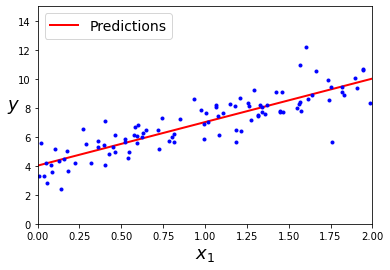

In [4]:
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

### stochastic gradient descent

in practice, to update $\theta$ by gradient descent(concretely batch gradient descent), at each step, we need to calculate all sample's gradient, too slow.

to fix this problem, we can only use one sample's gradient at a time, choose that sample randomly:

$$\theta := \theta - \alpha{l(h_{\theta}(x^{(i)}), y^{(i)})}$$

In [5]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.02841216]), array([3.02324524]))

### mini-batch gradient descent

sgd too random, batch gradient descent too slow, we can use some(not one, not all) samples at a time:

$$\theta := \theta - \alpha\sum_{i \in batch}{l(h_{\theta}(x^{(i)}), y^{(i)})}$$

## update rule of linear regression

for linear regression, we have:

$$
\begin{equation}
\begin{split} 
\frac{\partial }{\partial \theta_{j}}J(\theta ) &=  \frac{\partial }{\partial \theta_{j}}\frac{1}{2}\sum_{i=1}^{n}(h_{\theta }(x^{(i)}) - y^{(i)})^2  \\ 
&=\sum_{i=1}^{n}(h_{\theta }(x^{(i)}) - y^{(i)})\cdot{}\frac{\partial }{\partial \theta_{j}}(h_{\theta }(x^{(i)}) - y^{(i)})\\ 
& =\sum_{i=1}^{n}(h_{\theta }(x^{(i)}) - y^{(i)})x_{j}^{(i)}
\end{split}
\end{equation}
$$

so we have the update rule for linear regression:

$$\theta_{j}: =\theta_{j} - \alpha\sum_{i=1}^{n} (h_{\theta }(x^{(i)}) - y^{(i)})x_{j}^{(i)} $$

combine all dimensions, we have:

$$\theta: =\theta - \alpha\sum_{i=1}^{n} (h_{\theta }(x^{(i)}) - y^{(i)})\cdot x^{(i)} $$

### matrix form

define $X = [(x^{(1)})^{T},...,(x^{(n)})^{T}]$, then we can write $J(\theta)$ in matrix form:

$$
\begin{equation}
\begin{split}
J(\theta) &= \frac{1}{2}\sum_{i=1}^{n}(h_{\theta}x^{(i)} - y^{(i)})^2 \\
&= \frac{1}{2}\sum_{i=1}^{n}(\theta^{T}x^{(i)} - y^{(i)})^2 \\
&= \frac{1}{2}(X\theta - y)^{T}(X\theta - y)
\end{split}
\end{equation}
$$

we then have:

$$
\begin{equation}
\begin{split}
\nabla{J(\theta )} &= \nabla\frac{1}{2}(X\theta - y)^{T}(X\theta - y) \\
&= \frac{1}{2}\nabla(\theta^{T}X^{T}X\theta - y^{T}(X\theta) - (X\theta)^{T}y) \\
&= \frac{1}{2}\nabla(\theta^{T}X^{T}X\theta - 2(X^{T}y)^{T}\theta) \\
&= \frac{1}{2}(2X^{T}X\theta - 2(X^{T}y)) \\
&= X^{T}X\theta - X^{T}y
\end{split}
\end{equation}
$$

here we use

1.$a^{T}b=b^{T}a$, obvious.

2.$\nabla{a^{T}x}=a$, obvious.

3.$\nabla{x^{T}Ax} = (A + A^{T})x$, proof:

$$
\begin{equation}
\begin{split}
\frac{\partial}{\partial x_{i}}x^{T}Ax &= 
\frac{\partial}{\partial x_{i}}{\sum_{j=1}^{n}}{\sum_{k=1}^{n}}a_{jk}x_{j}x_{k} \\
&= \frac{\partial}{\partial x_{i}}(\sum_{j\ne{i}}a_{ji}x_{j}x_{i} + \sum_{k\ne{i}}a_{ik}x_{i}x_{k} + a_{ii}x_{i}^{2}) \\
&= \sum_{j\ne{i}}a_{ji}x_{j} + \sum_{k\ne{i}}a_{ik}x_{k} + 2a_{ii}x_{ii} \\
&= \sum_{j=1}^{n}a_{ji}x_{j} + \sum_{k=1}^{n}a_{ik}x_{k} \\
&= (A^{T}x)_{i} + (Ax)_{i}
\end{split}
\end{equation}
$$

finally, we get the matrix form of the update rule:

$$\theta: =\theta - \alpha X^{T}(X\theta-\mathbf{y} ) $$

## analytic solution

from above, we have:

$$\nabla{J(\theta )} = X^{T}X\theta - X^{T}y$$

so the equation of zero gradient change to:

$$X^{T}X\theta - X^{T}y = 0$$

if $X^{T}X$ is invertible:

$$\theta = (X^{T}X)^{-1}X^{T}y$$

if $X^{T}X$ is not invertible, the equation also have solution. proof:

on one hand $X\theta = 0 \Rightarrow X^{T}X\theta=0$<br>
on the other hand $X^{T}X\theta=0 \Rightarrow \theta^{T}X^{T}X\theta=0 \Rightarrow (X\theta)^{T}X\theta=0 \Rightarrow X\theta=0$<br>
so $X\theta=0 \Leftrightarrow X^{T}X\theta=0$, that is to say $null(X^{T}X)=null(X)$<br>
we easily derive from the above that $rank(X^{T}X) = rank(X) = rank(X^{T})$<br>
but $range(X^{T}X) \subseteq  range(X^{T})$, so we must have $range(X^{T}X)=range(X^{T})$<br>

In [6]:
X_b = np.c_[np.ones((100, 1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[4.0134073 ],
       [3.00194802]])

## geometric interpretation of the linear regression

consider the linear space $S = span\left \{  columns\ of\ X \right \}$, linear combination of $S$ could be write as $X\theta$, then:

$X\theta$ is the projection of $y$ on $S \Leftrightarrow$ $X\theta - y$ orthogonal with $S \Leftrightarrow$ orthogonal with $columns\ of\ X \Leftrightarrow X^{T}(X\theta - y)=0$

so linear regression could be interpret as finding the projection of $y$ on $S$.

## probabilistic interpretation

assume targets and inputs are related via:

$$y^{(i)} = \theta^{T}x^{(i)} + \epsilon^{(i)}$$

where $\epsilon^{(i)}$ is the error term, assume that $\epsilon^{(i)}$ are distributed IID according to Gaussian with mean 0 and variance $\sigma^{2}$, i.e the density of $\epsilon^{(i)}$ is given by:

$$p(\epsilon^{(i)}) = \frac{1}{\sqrt{2\pi}\sigma}exp\left (-\frac{(\epsilon^{(i)})^{2}}{2\sigma^{2}}\right )$$

this implies:

$$p(y^{(i)}|x^{(i)}; \theta) = \frac{1}{\sqrt{2\pi}\sigma}exp\left ( -\frac{(y^{(i)} - \theta^{T}x^{(i)})^{2}}{2\sigma^{2}}\right)$$

we should denote that $\theta$ is not a random variable.

given $X$ and $\theta$, what is the probability of $y$? we call it the likelihood function:

$$L(\theta) = L(\theta; X,y) = p(y|X; \theta)$$

for the above assumptions:

$$
\begin{equation}
\begin{split}
L(\theta) &= \prod_{i=1}^{n}p(y^{(i)}|x^{(i)}; \theta) \\
&= \prod_{i=1}^{n}\frac{1}{\sqrt{2\pi}\sigma}exp\left ( -\frac{(y^{(i)} - \theta^{T}x^{(i)})^{2}}{2\sigma^{2}}\right)
\end{split}
\end{equation}
$$

we should choose $\theta$ so as to make the data as high probability as possible, i.e we should choose $\theta$ to maxmize $L(\theta)$, this is called maximum likelihood. one step further:

$$maximize\ L(\theta) \Leftrightarrow maxmize\ log(L(\theta))$$

so we maximize the log likelihood, this is simpler.

$$
\begin{equation}
\begin{split}
l(\theta) &= log(L(\theta)) \\
&= log\prod_{i=1}^{n}\frac{1}{\sqrt{2\pi}\sigma}exp\left ( -\frac{(y^{(i)} - \theta^{T}x^{(i)})^{2}}{2\sigma^{2}}\right) \\
&= \sum_{i=1}^{n}log\frac{1}{\sqrt{2\pi}\sigma}exp\left ( -\frac{(y^{(i)} - \theta^{T}x^{(i)})^{2}}{2\sigma^{2}}\right) \\
&= n\ log\frac{1}{\sqrt{2\pi}\sigma} - \frac{1}{2\sigma^{2}}\sum_{i=1}^{n}(y^{(i)} - \theta^{T}x^{(i)})^{2}
\end{split}
\end{equation}
$$

hence, maximizing $l(\theta)$ gives the same answer as minimizing

$$\frac{1}{2}\sum_{i=1}^{n}(y^{(i)} - \theta^{T}x^{(i)})^{2} = J(\theta)$$

so linear regression $\Leftrightarrow $ maximum likelihood given Gaussian error

## regularization

to lower variance $\Rightarrow $ to limit model's complexity $\Rightarrow $ to prevent the absolute value of parameters to be too large $\Rightarrow $ we add punishment term concerning the absolute value of parameters on $J(\theta)$

choose $\lambda{\left \| \theta   \right \|}_{2}^{2}$ as the punishment term:

$$J(\theta) := J(\theta) + \lambda{\left \| \theta   \right \|}_{2}^{2}$$

$\lambda$ is the regularization hyperparameter, linear regression with $l_{2}$ loss is ridge regression.

otherwise, if we choose $\lambda{\left \| \theta   \right \|}_{1}$ as the punishment term:

$$J(\theta) := J(\theta) + \lambda{\left \| \theta   \right \|}_{1}$$

that is called lasso regression.

## probabilistic interpretation of regularization

as before, we assume:

$$p(y^{(i)}|x^{(i)}; \theta) = \frac{1}{\sqrt{2\pi}\sigma}exp\left ( -\frac{(y^{(i)} - \theta^{T}x^{(i)})^{2}}{2\sigma^{2}}\right)$$

in bayes perspective, we can also assume $\theta \sim N(0, \sigma_{0})$, that is:

$$p(\theta) = \frac{1}{\sqrt{2\pi}\sigma_{0}}exp\left ( -\frac{\left \| \theta   \right \|_{2}^{2}}{2\sigma_{0}^{2}}\right)$$

by bayes rule:

$$P(\theta|y)=\frac{P(y|\theta)P(\theta)}{P(y)}$$

thus we have maximum a posteriori estimation(MAP):

$$
\begin{equation}
\begin{split}
\hat{\theta} =&\underset{\theta}{argmax}P(\theta|y)\\
=&\underset{\theta}{argmax}P(y|\theta)P(\theta) \\
=&\underset{\theta}{argmax}\ logP(y|\theta)P(\theta) \\
=&\underset{\theta}{argmax}\ log\ exp\left ( \sum_{i=1}^{n}-\frac{(y^{(i)} - \theta^{T}x^{(i)})^{2}}{2\sigma^{2}}\right)exp\left ( -\frac{\left \| \theta   \right \|_{2}^{2}}{2\sigma_{0}^{2}}\right)\\
=&\underset{\theta}{argmin}\left(\sum_{i=1}^{n}\frac{(y^{(i)} - \theta^{T}x^{(i)})^{2}}{2\sigma^{2}} + \frac{\left \| \theta   \right \|_{2}^{2}}{2\sigma_{0}^{2}}\right)\\
=&\underset{\theta}{argmin}\left(\sum_{i=1}^{n}(y^{(i)} - \theta^{T}x^{(i)})^{2} + \frac{\sigma^{2}}{\sigma_{0}^{2}}\left \| \theta   \right \|_{2}^{2}\right)
\end{split}
\end{equation}
$$

that is exactly minimize:

$$J(\theta) = \frac{1}{2}\sum_{i=1}^{n}(y^{(i)} - \theta^{T}x^{(i)})^2 + \lambda{\left \| \theta   \right \|}^{2}$$

with $\lambda=\frac{\sigma^{2}}{2\sigma_{0}^{2}}$

in one word:

1. linear regression $\Leftrightarrow $ maximum likelihood estimation(MLE) where noise is guassian.
2. ridge regression $\Leftrightarrow $ maximum a posteriori estimation(MAP) where noise and prior are guassian.

In [7]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[8.46777839]])

In [8]:
"""set SGDRegressor penalty=l2"""
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([8.63160742])

## Lasso

In [9]:
"""use Lasso or set SGDRegressor penalty=l1"""
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([8.34961266])

In [10]:
"""combination of ridge and lasso"""
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([8.2272819])

## Polynomial Regression

In [11]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

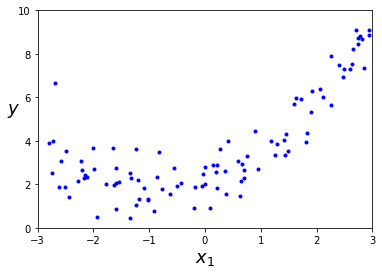

In [12]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [13]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.07532595]), array([[0.86616713, 0.50615805]]))

In [14]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

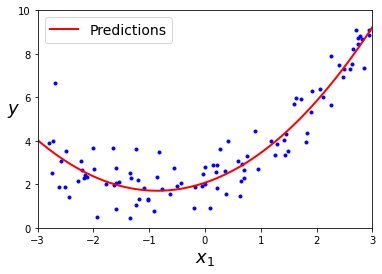

In [15]:
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

In [16]:
"""using pipeline"""
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


def polynomial_regression(degree, include_bias=True):
    return Pipeline([
        ("poly_features", PolynomialFeatures(degree=degree, include_bias=False)),
        ("std_scaler", StandardScaler()),
        ("lin_reg", LinearRegression()),
    ])

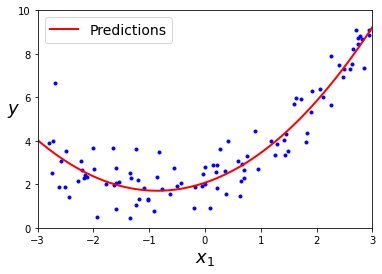

In [17]:
poly_reg = polynomial_regression(degree=2)
poly_reg.fit(X, y)

X_new = np.linspace(-3, 3, 100).reshape(100, 1)
y_new = poly_reg.predict(X_new)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()